## Завдання на практичну роботу

#### Виконав студент групи МІТ-31 _**Черевач Юрій**_

<div style='color:yellow; background-color:black;'>Для кожного завдання додатково використати різні моделі класифікації, налаштувати гіперпараметри, оцінити їхню ефективність та вивчити роботу з метриками якості та візуалізацією результатів.</div>

##### 1. Завдання для бінарної класифікації (Binary Classification):

- Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації.
- Розділіть дані на навчальний та тестовий набори.
- Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC.
- Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

In [43]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Найкращі гіперпараметри: {'C': 1, 'max_iter': 150}
Найкращий результат (середній): 0.85625
Точність в цілому: 0.80
Точність у визначенні цільової змінної: 0.78
Відгук: 0.78
F1 значення: 0.78
ROC AUC: 0.93
Матриця плутанини:
[[18  4]
 [ 4 14]]


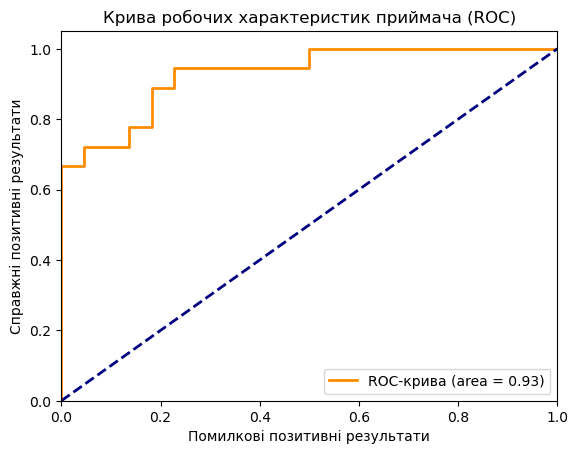

In [44]:

#зчитую датасет
data = pd.read_csv('classification_dataset.csv')

#розділяю дані на вхідні (X) на вихідні (y)
X = data.drop("Target", axis=1)
y = data["Target"]

#розділяю на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#визначення гіперпараметрів та їхніх значень
param_grid = {
    'C': [1, 100, 200],  # Параметр регуляризації в логістичній регресії
    'max_iter': [150, 250]  # Максимальна кількість ітерацій
}

#ініціалізація моделі
grid_search = GridSearchCV(LogisticRegression(), param_grid = param_grid)
grid_search.fit(X_train, y_train)

print("Найкращі гіперпараметри:", grid_search.best_params_)
print("Найкращий результат (середній):", grid_search.best_score_)

#використання моделі з оптимальними гіперпараметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# оцінка ефективності
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'Точність в цілому: {accuracy:.2f}')
print(f'Точність у визначенні цільової змінної: {precision:.2f}')
print(f'Відгук: {recall:.2f}')
print(f'F1 значення: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# побудова матриці плутанини
confusion = confusion_matrix(y_test, y_pred)
print('Матриця плутанини:')
print(confusion)

# візуалізація ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Помилкові позитивні результати')
plt.ylabel('Справжні позитивні результати')
plt.title('Крива робочих характеристик приймача (ROC)')
plt.legend(loc='lower right')
plt.show()

Точність доволі висока.

##### 2. Завдання для мультикласової класифікації (Multiclass Classification):

- Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації.
- Розділіть дані на навчальний та тестовий набори.
- Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини.
- Порівняйте результати різних класифікаторів.

In [45]:
data = pd.read_csv('multiclass_dataset.csv')

#розділяю дані на вхідні (X) на вихідні (y)
X = data.drop("Target", axis=1)
y = data["Target"]

#розділяю на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# створення та навчання класифікаторів
clf_lr = LogisticRegression(C=1.0, penalty='l2', max_iter=1000)
clf_svm = SVC(C=1.0, kernel='linear')
clf_dt = DecisionTreeClassifier(max_depth=None)

clf_lr.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

#створення функції для оцінки метрик
def evaluate_multiclass_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Оцінка для класифікатора {type(classifier).__name__}:')
    print(f'Точність в цілому: {accuracy:.2f}')
    print(f'Точність у визначенні цільової змінної: {precision:.2f}')
    print(f'Відгук: {recall:.2f}')
    print(f'F1 значення: {f1:.2f}')
    print('Матриця плутанини:')
    print(conf_matrix)

# використовую функцію для оцінки метрик:
print("\nОцінка логістичної регресії:\n")
evaluate_multiclass_classifier(clf_lr, X_test, y_test)

print("\nОцінка SVM:\n")
evaluate_multiclass_classifier(clf_svm, X_test, y_test)

print("\nОцінка дерева рішень:\n")
evaluate_multiclass_classifier(clf_dt, X_test, y_test)


Оцінка логістичної регресії:

Оцінка для класифікатора LogisticRegression:
Точність в цілому: 0.70
Точність у визначенні цільової змінної: 0.73
Відгук: 0.70
F1 значення: 0.71
Матриця плутанини:
[[ 6  2  1  0]
 [ 3 14  0  1]
 [ 2  0  5  0]
 [ 1  0  2  3]]

Оцінка SVM:

Оцінка для класифікатора SVC:
Точність в цілому: 0.68
Точність у визначенні цільової змінної: 0.69
Відгук: 0.68
F1 значення: 0.68
Матриця плутанини:
[[ 5  3  1  0]
 [ 4 12  0  2]
 [ 1  0  6  0]
 [ 1  0  1  4]]

Оцінка дерева рішень:

Оцінка для класифікатора DecisionTreeClassifier:
Точність в цілому: 0.65
Точність у визначенні цільової змінної: 0.68
Відгук: 0.65
F1 значення: 0.66
Матриця плутанини:
[[ 6  2  1  0]
 [ 3 11  0  4]
 [ 2  0  5  0]
 [ 0  1  1  4]]


Як бачимо, найкраще себе показала модель лінійної регресії. Точність досить висока у всіх моделях.

##### 3. Завдання для мультилейбл класифікації (Multilabel Classification):

- Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації.
- Розділіть дані на навчальний та тестовий набори.
- Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
- Вивчайте, як класифікатори працюють з різними комбінаціями мультилейбів.

In [46]:
data = pd.read_csv('multilabel_dataset.csv')

X = data[['Feature1', 'Feature2', 'Feature3']]
y = data[['Label1', 'Label2', 'Label3', 'Label4']]
# розділяємо дані на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# налаштування гіперпараметрів
param_grid = {
    'estimator__n_estimators': [10, 20, 30], #кількість дерев
    'estimator__max_depth': [1, 10, 20], #глибина
    'estimator__min_samples_split': [2, 7, 15], #швидкість
}

# створюємо модель, шукаємо кращі гіперпараметри та навчаємо
clf = MultiOutputClassifier(RandomForestClassifier(random_state=7))
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Виведення найкращих гіперпараметрів та результатів
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Найкращі гіперпараметри:", best_params)

y_pred = best_estimator.predict(X_test)

# оцінка точності та інші метрики
accuracy = accuracy_score(y_test, y_pred)
print(f'\nТочність на тестовій інформації: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'\nClassification Report:\n{report}')

Найкращі гіперпараметри: {'estimator__max_depth': 20, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 30}

Точність на тестовій інформації: 0.375

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.33      0.48        15
           1       0.88      0.83      0.86        18
           2       0.70      0.73      0.71        22
           3       0.71      0.59      0.65        17

   micro avg       0.77      0.64      0.70        72
   macro avg       0.78      0.62      0.67        72
weighted avg       0.78      0.64      0.68        72
 samples avg       0.75      0.62      0.65        72



e:\Apps\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Apps\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Тут уже точність не дуже висока, тому можна зробити висновок, що для мультилейбл класифікації варто використовувати нейронні мережі.